In [20]:
library(tidyverse)
library(tidyquant)
library(tsibble)
library(feasts)
library(fable)

In [21]:
data = tq_get(c("NVDA", "MSFT"), get = "stock.prices", from = "2023-01-01", to = "2024-03-29") %>% select(symbol, date, adjusted)
data


symbol,date,adjusted
<chr>,<date>,<dbl>
NVDA,2023-01-03,143.0798
NVDA,2023-01-04,147.4177
NVDA,2023-01-05,142.5800
NVDA,2023-01-06,148.5171
NVDA,2023-01-09,156.2034
NVDA,2023-01-10,159.0120
NVDA,2023-01-11,159.9315
NVDA,2023-01-12,165.0290
NVDA,2023-01-13,168.9071


In [22]:
returns = data %>% group_by(symbol) %>% tq_transmute(select = adjusted,
                mutate_fun = periodReturn,
                period = "daily",
                col_rename = "return")

returns

symbol,date,return
<chr>,<date>,<dbl>
NVDA,2023-01-03,0.000000000
NVDA,2023-01-04,0.030318090
NVDA,2023-01-05,-0.032816018
NVDA,2023-01-06,0.041640496
NVDA,2023-01-09,0.051753074
NVDA,2023-01-10,0.017980563
NVDA,2023-01-11,0.005782837
NVDA,2023-01-12,0.031873040
NVDA,2023-01-13,0.023499581


In [23]:
returns = pivot_wider(returns, id_cols = date, names_from = symbol, values_from = return )
returns

date,NVDA,MSFT
<date>,<dbl>,<dbl>
2023-01-03,0.000000000,0.0000000000
2023-01-04,0.030318090,-0.0437430758
2023-01-05,-0.032816018,-0.0296378265
2023-01-06,0.041640496,0.0117853410
2023-01-09,0.051753074,0.0097364439
2023-01-10,0.017980563,0.0076170252
2023-01-11,0.005782837,0.0302381833
2023-01-12,0.031873040,0.0116215041
2023-01-13,0.023499581,0.0030187497


In [24]:
data = pivot_wider(data, id_cols = date, names_from = symbol, values_from = adjusted)
data


date,NVDA,MSFT
<date>,<dbl>,<dbl>
2023-01-03,143.0798,237.0360
2023-01-04,147.4177,226.6673
2023-01-05,142.5800,219.9494
2023-01-06,148.5171,222.5415
2023-01-09,156.2034,224.7083
2023-01-10,159.0120,226.4199
2023-01-11,159.9315,233.2664
2023-01-12,165.0290,235.9774
2023-01-13,168.9071,236.6897


In [25]:
data = mutate(data, t = row_number())
data = as_tsibble(data, index = t)
data


date,NVDA,MSFT,t
<date>,<dbl>,<dbl>,<int>
2023-01-03,143.0798,237.0360,1
2023-01-04,147.4177,226.6673,2
2023-01-05,142.5800,219.9494,3
2023-01-06,148.5171,222.5415,4
2023-01-09,156.2034,224.7083,5
2023-01-10,159.0120,226.4199,6
2023-01-11,159.9315,233.2664,7
2023-01-12,165.0290,235.9774,8
2023-01-13,168.9071,236.6897,9


In [17]:
fit_var = data %>% model(var = VAR(vars(NVDA, MSFT)))

In [28]:
report(fit_var)

Series: NVDA, MSFT 
Model: VAR(5) 

Coefficients for NVDA:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)
           1.0052      -0.0142      -0.1611      -0.0769       0.1265
s.e.       0.0658       0.1937       0.0936       0.2631       0.0935
      lag(MSFT,3)  lag(NVDA,4)  lag(MSFT,4)  lag(NVDA,5)  lag(MSFT,5)
           0.2302       0.0017      -0.2256       0.0325       0.0895
s.e.       0.2619       0.0939       0.2636       0.0674       0.1923

Coefficients for MSFT:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)
          -0.0015       0.9174       0.0027      -0.0739      -0.0098
s.e.       0.0224       0.0659       0.0318       0.0895       0.0318
      lag(MSFT,3)  lag(NVDA,4)  lag(MSFT,4)  lag(NVDA,5)  lag(MSFT,5)
           0.1574       0.0175      -0.0059      -0.0115       0.0108
s.e.       0.0891       0.0319       0.0896       0.0229       0.0654

Residual covariance matrix:
         NVDA    MSFT
NVDA 193.7581 31.2009
MSFT

In [29]:
fit_var = data %>% model(VAR(vars(NVDA, MSFT), ic = "bic"))
report(fit_var)

Series: NVDA, MSFT 
Model: VAR(3) 

Coefficients for NVDA:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)
           1.0083      -0.0347      -0.1531      -0.0705       0.1479
s.e.       0.0644       0.1893       0.0917       0.2589       0.0654
      lag(MSFT,3)
           0.1101
s.e.       0.1879

Coefficients for MSFT:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)
          -0.0006       0.9185      -0.0002      -0.0713      -0.0017
s.e.       0.0219       0.0642       0.0311       0.0879       0.0222
      lag(MSFT,3)
           0.1585
s.e.       0.0638

Residual covariance matrix:
         NVDA    MSFT
NVDA 190.9662 30.5145
MSFT  30.5145 22.0025

log likelihood = -2114.29
AIC = 4260.57	AICc = 4262.44	BIC = 4320.26

In [30]:
fit_var = data %>% model(var = VAR(vars(NVDA, MSFT) ~ AR(10)))
report(fit_var)

Series: NVDA, MSFT 
Model: VAR(10) 

Coefficients for NVDA:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)
           1.0021      -0.0031      -0.1635      -0.1345       0.1499
s.e.       0.0676       0.2015       0.0957       0.2711       0.0963
      lag(MSFT,3)  lag(NVDA,4)  lag(MSFT,4)  lag(NVDA,5)  lag(MSFT,5)
           0.2220      -0.0179      -0.2269       0.0938       0.0965
s.e.       0.2691       0.0969       0.2714       0.0970       0.2704
      lag(NVDA,6)  lag(MSFT,6)  lag(NVDA,7)  lag(MSFT,7)  lag(NVDA,8)
          -0.0347      -0.2257       0.0927       0.2155      -0.0864
s.e.       0.0973       0.2709       0.0972       0.2712       0.0966
      lag(MSFT,8)  lag(NVDA,9)  lag(MSFT,9)  lag(NVDA,10)  lag(MSFT,10)
           0.0112       0.0306      -0.0612       -0.0665        0.1142
s.e.       0.2700       0.0969       0.2700        0.0702        0.1974

Coefficients for MSFT:
      lag(NVDA,1)  lag(MSFT,1)  lag(NVDA,2)  lag(MSFT,2)  lag(NVDA,3)


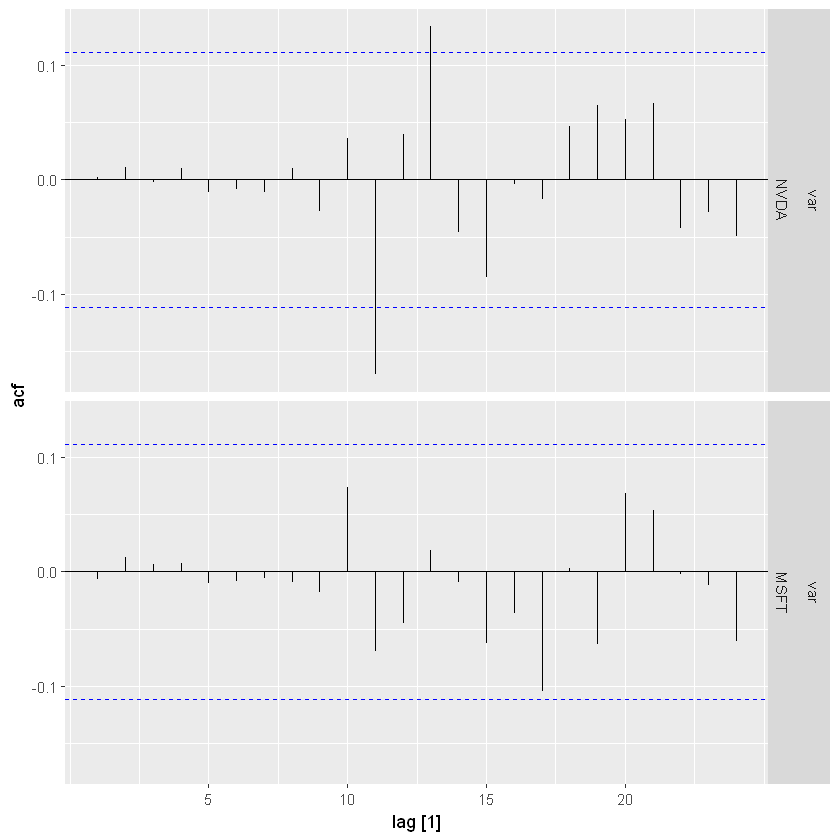

In [31]:
fit_var |>
  augment() |>
  ACF(.innov) |>
  autoplot()

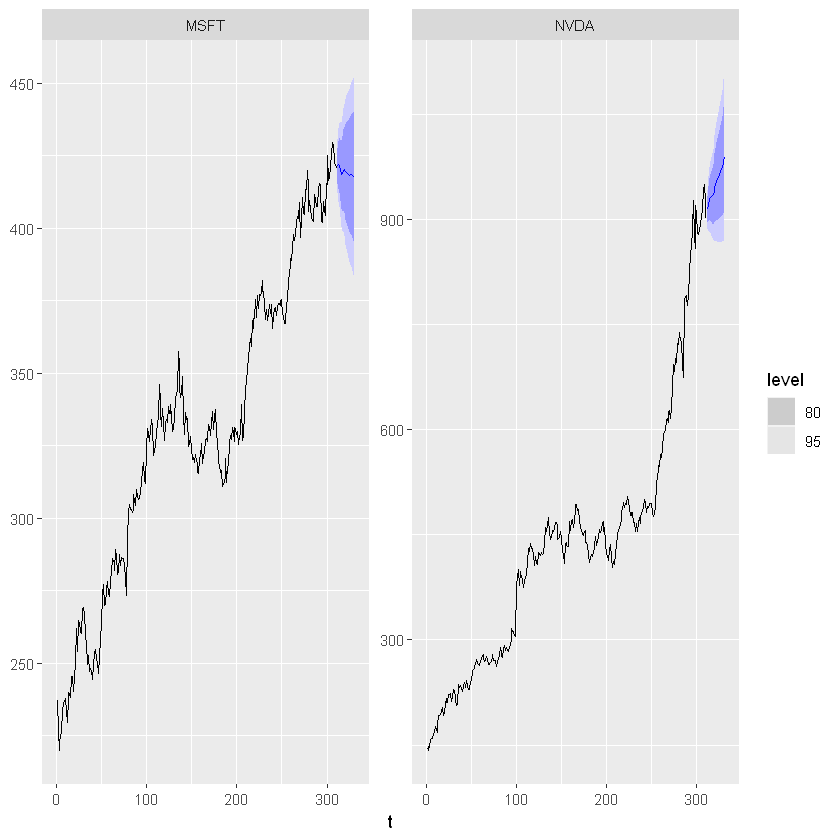

In [32]:
fit_var |>
  forecast(h=20) |>
  autoplot(data)

In [33]:
glance(fit_var)$sigma2

,NVDA,MSFT
NVDA,199.21425,31.83131
MSFT,31.83131,22.29134


In [36]:
retornos <- c(.05,.02,.03,.03)
precios_iniciales <- c(100,105,107.1,113)
precios <- precios_iniciales * exp(cumsum(retornos))
precios

[1] 105.1271 112.6134 118.3638 128.6876